In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
import numpy as np
from datetime import datetime
from folium.features import DivIcon

df = pd.read_csv('../../data/pos.csv')

In [6]:
# Check if mmsi is from a Tugboat; This is done by checking if the ship ever enters the
# 'Schlepperhafen' area
def is_tugboat(lats, lons):
    top_left = (53.553079, 8.560255)
    top_right = (53.553130,8.561651)
    bottom_right = (53.552225,8.561758)
    bottom_left = (53.552250,8.560362)

    return any(lat < top_left[0] and lat > bottom_left[0] and lon > top_left[1] and lon < top_right[1] for lat, lon in zip(lats, lons))


is_tugboat([20, 53.55260666666667], [8.56090166666, 8.56090166666])

,mmsi,lon,lat,cog,sog,nav_status,time,day
0,211228220,8.577990,53.524982,233.699997,0.0,0,1591005803,0
1,211625860,8.575388,53.516683,250.199997,0.0,0,1591005804,0
2,211750690,8.577592,53.526018,222.800003,0.0,0,1591005805,0
3,211713320,8.575517,53.518398,7.400000,0.0,0,1591005805,0
4,211599340,8.580392,53.536363,267.000000,0.0,0,1591005806,0
...,...,...,...,...,...,...,...,...
1465229,211717470,8.576000,53.524263,13.700000,0.0,0,1593523202,29
1465230,211228220,8.578288,53.525320,283.799988,0.0,0,1593523203,29
1465231,211220820,8.578612,53.528213,111.599998,0.0,0,1593523206,29
1465232,211717470,8.576057,53.524245,13.700000,0.0,0,1593523210,29


<AxesSubplot:>

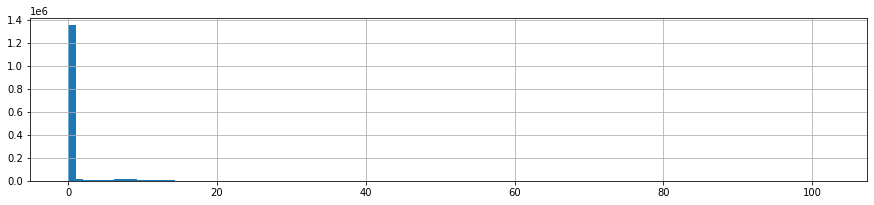

In [7]:
df['sog'].hist(bins=100, figsize=(15,3))

In [3]:
m = folium.Map(location=[53.54, 8.56])
grp = df.groupby(["mmsi", "day"])

In [4]:
for mmsi, day in list(df.groupby(["mmsi", "day"]).groups.keys())[:10]:
    ship = grp.get_group((mmsi, day))
    ship = ship.sort_values(by=['time'])
    past_mole = ship[(ship["lon"] > 8.57603)]
    if len(past_mole) > 0:
        time_passing_mole = past_mole.iloc[0]["time"]
        ship = ship[(ship["time"]< int(time_passing_mole))]
    times = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%SZ') for x in ship["time"]]
    coordinates = np.vstack((ship['lat'], ship['lon'])).T
    if len(coordinates) == 0 or is_tugboat(ship['lat'], ship['lon']):
        continue
    print(f'{mmsi} {day}')
    data_tuples = list(zip(coordinates, times))
    line = folium.PolyLine(coordinates,
        weight=1,
        color="black",
    ).add_to(m)
    attr = {"font-weight": "bold", "font-size": "24"}
    plugins.PolyLineTextPath(line, line_color='#FF0000', line_weight=5, attributes=attr, text="").add_to(m)
    for tuple in data_tuples:
        #folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=1 ).add_to( m )
        folium.CircleMarker(location=[tuple[0][0], tuple[0][1]], radius=2, popup=f'lat:{tuple[0][0]},  lon: {tuple[0][1]}, time: {tuple[1]} mmsi: {mmsi}').add_to(m)
        #folium.Marker(location=[tuple[0][0], tuple[0][1]], icon=DivIcon(icon_size=(150,36), icon_anchor=(-13,0),
        #    html='<div style="font-size: 8pt;">{}</div>'.format(tuple[1]))).add_to(m)
m
#m.save("index2.html")

205146000 19
209275000 18
210621000 24


True

In [4]:
g = df.groupby(["mmsi", "day"])
for i, j in list(df.groupby(["mmsi", "day"]).groups.keys())[:20]:
    print(g.get_group((i,j)))

              mmsi       lon        lat        cog  sog  nav_status  \
1042915  205146000  8.585228  53.503808  95.699997  0.0           3   
1042954  205146000  8.585233  53.503795  95.699997  0.0           3   
1042986  205146000  8.585233  53.503780  95.699997  0.0           3   
1043055  205146000  8.585250  53.503783  95.699997  0.0           3   
1043141  205146000  8.585212  53.503793  95.699997  0.0           3   
...            ...       ...        ...        ...  ...         ...   
1115270  205146000  8.585255  53.503777  36.299999  0.0           3   
1115340  205146000  8.585260  53.503783  36.299999  0.0           3   
1115349  205146000  8.585263  53.503783  36.299999  0.0           3   
1115388  205146000  8.585243  53.503793  36.000000  0.0           3   
1115396  205146000  8.585250  53.503790  36.000000  0.0           3   

               time  day  
1042915  1592689921   19  
1042954  1592689961   19  
1042986  1592690001   19  
1043055  1592690082   19  
1043141  159

In [ ]:
g = df.groupby(["mmsi", "day"])
for i, j in list(df.groupby(["mmsi", "day"]).groups.keys())[:20]:
    g.get_group((i,j))

In [ ]:
import geopandas as gpd
from pandasql import sqldf
import fiona

gdb_db = "../../data/Zone17_2014_10.gdb"
layers = {}
layerlist = fiona.listlayers(gdb_db)
layerlist

In [ ]:
for layer in layerlist:
    print("1")
    layers[layer] = gpd.read_file(gdb_db, driver="FileGDB", layer=layer, rows=500000)

In [ ]:
layers.keys()

vessels = layers['Zone17_2014_10_Vessel']
voyages = layers['Zone17_2014_10_Voyage']
broadcasts = layers['Zone17_2014_10_Broadcast']
broadcasts['lon'] = broadcasts.geometry.x
broadcasts['lat'] = broadcasts.geometry.y
broadcasts.drop("geometry", axis=1, inplace=True)

In [ ]:
sqldf("SELECT VoyageID FROM voyages WHERE Destination == 'CASABLANCA'")

In [ ]:
destination = 'CASABLANCA'
destination_bc = sqldf(f"SELECT * FROM broadcasts WHERE VoyageID IN (SELECT VoyageID FROM voyages);")
destination_bc



In [ ]:
broadcasts.value_counts(['VoyageID'])

# Filter voyages by amount of ais signals received for that tour ("GROUP BY voyageID HAVING COUNT(*) > X")
casts = broadcasts[broadcasts["Destination"] == "CASABLANCA"].groupby("VoyageID").filter(lambda x: len(x) > 500).groupby("VoyageID").sum()
casts


In [ ]:
destination_bc

In [ ]:

fig = px.scatter_mapbox(destination_bc, lon="lon", lat="lat", color="VoyageID", size="VoyageID",
                        size_max=3, zoom=10.5, height=600, opacity=0.6, center={'lat':25, 'lon': -80})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b": 0})